In [1]:
# from scouting_detector import *
%load_ext autoreload
%autoreload 2
import importlib
import sc2reader
from sc2reader.engine.plugins import SelectionTracker, APMTracker
from selection_plugin import ActiveSelection
sc2reader.engine.register_plugin(SelectionTracker())
sc2reader.engine.register_plugin(APMTracker())
sc2reader.engine.register_plugin(ActiveSelection())

In [2]:
with open("valid_game_ids.txt") as fp:
    replay_files = [f"replays/{x.strip()}" for x in fp.readlines()][:30]

In [3]:
import logging, sys
root = logging.getLogger()
handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
root.addHandler(handler)

In [3]:
rs = list(sc2reader.load_replays(replay_files))

In [4]:
print([f"has build {r.build}, but best available datapack is {r.datapack.id}" for r in rs if hasattr(r, "marked_error") and r.marked_error])
errors = [r for r in rs if (hasattr(r, "marked_error") and r.marked_error)]
rs = [r for r in rs if not (hasattr(r, "marked_error") and r.marked_error)]
print(f"{len(rs)} good replays: {[r.filename for r in rs]}")

['has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379', 'has build 80188, but best available datapack is 77379']
17 good replays: ['replays/spawningtool_59334.SC2Replay', 'replays/spawningtool_59330.SC2Replay', 'replays/spawningtool_59303.SC2Replay', 'replays/spawningtool_59259.SC2Replay', 'replays/spawningtool_59258.SC2Replay', 'replays/spawningtool_59257.SC2Replay', 

In [ ]:
import sc2reader.data as sc2data
sc2data.ABIL_LOOKUP

In [12]:
for err in errors:
    print()
    print(err.filename)
    for e in err.events:
        if hasattr(e, "ability_id") and e.ability_id not in err.datapack.abilities:
            print(e.active_selection, e.ability_type, e.ability_type_data, e.ability_link, e.command_index)


replays/spawningtool_59347.SC2Replay
[Nexus [59C0001]] TargetUnit {'flags': 111, 'timer': 0, 'unit_tag': 110624769, 'unit_link': 468, 'control_player_id': 1, 'upkeep_player_id': 1, 'point': {'x': 188416, 'y': 389120, 'z': 40896}} 695 0

replays/spawningtool_59329.SC2Replay
[BarracksFlying [30C0001]] None None 147 30

replays/spawningtool_59300.SC2Replay
[Nexus [2CC0001], Nexus [37C0001], Nexus [50C0002], Nexus [6980002]] TargetUnit {'flags': 111, 'timer': 0, 'unit_tag': 116654082, 'unit_link': 468, 'control_player_id': 1, 'upkeep_player_id': 1, 'point': {'x': 221184, 'y': 471040, 'z': 40944}} 695 0

replays/spawningtool_59281.SC2Replay
[Nexus [3540001], Nexus [3E00001], Nexus [48C0001]] TargetUnit {'flags': 111, 'timer': 0, 'unit_tag': 86769665, 'unit_link': 468, 'control_player_id': 2, 'upkeep_player_id': 2, 'point': {'x': 458752, 'y': 548864, 'z': 40912}} 695 0
[Nexus [3540001], Nexus [3E00001], Nexus [48C0001]] TargetPoint {'point': {'x': 190183, 'y': 248422, 'z': 42006}} 719 0
[Ne

In [26]:
print([(e.name, e.ability_name, e.active_selection, e.ability_link) for e in err.events if 
 hasattr(e, "ability_name") and "Lift" in e.ability_name])
[u for u in err.objects.values() if u.name and "Flying" in u.name]

[('BasicCommandEvent', 'LiftBarracks', [BarracksFlying [3B80001]], 148), ('BasicCommandEvent', 'LiftStarport', [Starport [4500001]], 152), ('BasicCommandEvent', 'LiftBarracks', [BarracksFlying [3B80001]], 148), ('BasicCommandEvent', 'LiftCommandCenter', [OrbitalCommand [4C00001]], 145), ('BasicCommandEvent', 'LiftStarport', [Starport [4500001]], 152), ('BasicCommandEvent', 'LiftBarracks', [BarracksFlying [3B80001]], 148), ('BasicCommandEvent', 'LiftBarracks', [Barracks [3B40001]], 148), ('BasicCommandEvent', 'LiftStarport', [Starport [44C0001]], 152), ('BasicCommandEvent', 'LiftOrbitalCommand', [OrbitalCommand [4E40001]], 230), ('BasicCommandEvent', 'LiftBarracks', [Barracks [5640001]], 148), ('BasicCommandEvent', 'LiftBarracks', [BarracksFlying [3B80001]], 148), ('BasicCommandEvent', 'LiftFactory', [Factory [6100001]], 150), ('BasicCommandEvent', 'LiftBarracks', [Barracks [6440001]], 148), ('BasicCommandEvent', 'LiftCommandCenter', [OrbitalCommand [3580001], OrbitalCommand [4180001], 

[BarracksFlying [3B80001],
 OrbitalCommandFlying [4140001],
 OrbitalCommandFlying [9100003],
 OrbitalCommandFlying [1C0002],
 OrbitalCommandFlying [8E40002],
 CommandCenterFlying [9180016]]

In [27]:
r = rs[0]
[(o.owner, o.location, o.started_at, o.finished_at, o.died_at) for o in r.objects.values() if "Command" in o.name and o.owner]

[(Player 1 - Beastyqt (Terran), (160, 46), 0, 0, None),
 (Player 2 - demuLarva (Terran), (55, 157), 0, 0, None),
 (Player 2 - demuLarva (Terran), (82, 160), 2353, 3953, None),
 (Player 1 - Beastyqt (Terran), (133, 43), 2435, 4035, None),
 (Player 2 - demuLarva (Terran), (71, 131), 5776, 7376, None),
 (Player 1 - Beastyqt (Terran), (103, 44), 6238, 7838, None),
 (Player 2 - demuLarva (Terran), (86, 153), 11897, 13497, None),
 (Player 2 - demuLarva (Terran), (58, 141), 13413, 15013, None),
 (Player 2 - demuLarva (Terran), (85, 153), 13723, 15323, None),
 (Player 1 - Beastyqt (Terran), (167, 58), 13967, 15567, None),
 (Player 1 - Beastyqt (Terran), (144, 72), 14111, 15711, None),
 (Player 1 - Beastyqt (Terran), (144, 72), 16451, None, 17502),
 (Player 1 - Beastyqt (Terran), (110, 53), 17161, 18761, None),
 (Player 2 - demuLarva (Terran), (85, 129), 20416, 22016, None),
 (Player 1 - Beastyqt (Terran), (136, 78), 23736, 25336, None)]

In [ ]:
es = [e for e in r.events if isinstance(e, sc2reader.events.game.TargetUnitCommandEvent) or 
      isinstance(e, sc2reader.events.game.TargetPointCommandEvent)]

In [ ]:
[(e.name, e.ability_name) for e in es if "Command" in e.ability_name]
# [(e.target_unit_id, event.location) for e in es if "Command" in e.ability_name]

In [ ]:
sorted([(u.location, u) for u in r.objects.values() if "Mineral" in u.name and hasattr(u, "location")])

In [28]:
from xml.dom import minidom
r.load_map()
xmldoc = minidom.parseString(r.map.archive.read_file('Objects'))
itemlist = xmldoc.getElementsByTagName('ObjectUnit')
mineralPosStrs = [ou.attributes['Position'].value for ou in itemlist if 'MineralField' in ou.attributes['UnitType'].value]
mineralLocs = [tuple([float(num) for num in mps.split(',')[0:2]]) for mps in mineralPosStrs]
sorted(mineralLocs)

[(42.0, 115.5),
 (43.0, 114.5),
 (43.0, 116.5),
 (43.0, 118.5),
 (44.0, 119.5),
 (47.0, 120.5),
 (48.0, 158.5),
 (49.0, 121.5),
 (49.0, 157.5),
 (49.0, 159.5),
 (49.0, 161.5),
 (50.0, 120.5),
 (50.0, 162.5),
 (53.0, 163.5),
 (55.0, 42.5),
 (55.0, 164.5),
 (56.0, 41.5),
 (56.0, 163.5),
 (58.0, 71.5),
 (58.0, 73.5),
 (59.0, 40.5),
 (59.0, 68.5),
 (59.0, 70.5),
 (59.0, 74.5),
 (59.0, 76.5),
 (60.0, 39.5),
 (60.0, 67.5),
 (60.0, 77.5),
 (63.0, 39.5),
 (64.0, 40.5),
 (64.0, 133.5),
 (65.0, 131.5),
 (65.0, 133.5),
 (65.0, 135.5),
 (66.0, 136.5),
 (67.0, 41.5),
 (68.0, 42.5),
 (69.0, 137.5),
 (71.0, 138.5),
 (72.0, 137.5),
 (75.0, 161.5),
 (76.0, 160.5),
 (76.0, 162.5),
 (76.0, 164.5),
 (77.0, 165.5),
 (80.0, 166.5),
 (82.0, 167.5),
 (83.0, 166.5),
 (88.0, 70.5),
 (89.0, 67.5),
 (89.0, 69.5),
 (89.0, 71.5),
 (90.0, 66.5),
 (93.0, 65.5),
 (95.0, 64.5),
 (96.0, 65.5),
 (103.0, 38.5),
 (104.0, 37.5),
 (105.0, 160.5),
 (106.0, 38.5),
 (106.0, 159.5),
 (106.0, 161.5),
 (106.0, 163.5),
 (107.0, 164

In [40]:
landOCCC = ['LandOrbitalCommand', 'LandCommandCenter']
OCCC_names = ['OrbitalCommand', 'CommandCenter']
tier1_base_names = ["Hatchery", "Nexus", "CommandCenter"]
base_names = set(["Hatchery", "Lair", "Hive", "Nexus", "CommandCenter", "CommandCenterFlying", "OrbitalCommand", "OrbitalCommandFlying","PlanetaryFortress"])
build_base_names = ['BuildHatchery','BuildNexus','BuildCommandCenter']

efilter = lambda e: (e.name == 'TargetPointCommandEvent' and e.ability_name in landOCCC) or \
          (e.name == 'UnitTypeChangeEvent' and e.unit_type_name in OCCC_names) or \
          (e.name in ['UnitDoneEvent', 'UnitInitEvent'] and e.unit is not None and e.unit.name in base_names) or \
          (e.name == "TargetPointCommandEvent" and e.ability_name in build_base_names)

for r in rs:
    print(f"\n{r.filename}")
    for event in filter(efilter, r.events):
    #     if hasattr(event, 'unit') and event.unit.owner is None:
    #       # crazy, but some misparsed replays have events with units without a known owner
    #       continue
        if event.name == 'TargetPointCommandEvent':
            if event.ability_name in landOCCC:
                selecteds = event.active_selection
                selected_occcs = [obj for obj in selecteds if sorted(obj.type_history.items())[0][1].name == 'CommandCenter']
                if len(selected_occcs) == 0:
                    print(f"Landing an OC/CC but none selected. WTF. event={event}, selecteds={selecteds}")
                else:
                    selected_occc = selected_occcs[0]
                    print(selected_occcs)
                    print(f"{event.player} landing {selected_occc} at {event.frame} at {event.location} (finished at {selected_occc.finished_at})")
            elif event.ability_name in build_base_names:
                x,y,z = event.location
                print(f"{event.player} ordered {event.ability_name} at {framestr(event.frame)} {(x,y)}")
                base_type = event.ability_name[5:]
                matched_to_unitinit = False
                # sometimes the UnitInit tracker event comes in the same
                # frame as the build command
                for base in event.player.bases:
                    if base.started_at == event.frame and (base in baselocations) and abs(baselocations[base][0] - x) < TRACKER_GRID_SIZE and abs(baselocations[base][1] - y) < TRACKER_GRID_SIZE:
                        if debug_miningbases and debuglevel_miningbases >= 1:
                            print "Matched to {}".format(base)
                        baselocations[base] = (x,y)
                        matched_to_unitinit = True
                    elif debug_miningbases and debuglevel_miningbases >= 1:
                        print "Didnt match. Base: {} {} {}, event {} {} {}".format(base.started_at, base.location[0], base.location[1], event.frame, x, y)
                if not matched_to_unitinit:
                    for index, (frame1, (x1,y1), owner) in enumerate(ordered_bases[base_type]):
                        if (abs(x-x1) < BUILDING_SIZE and abs(y-y1) < BUILDING_SIZE):
                            if debug_miningbases and debuglevel_miningbases >= 1:
                                print "Same location replaces a previous command"
                            ordered_bases[base_type][index] = (event.frame, (x,y), event.player)
                            break
                    else:
                        if debug_miningbases and debuglevel_miningbases >= 1:
                            print "No replacement was found"
                        ordered_bases[base_type].append( (event.frame, (x,y), event.player) )


replays/spawningtool_59334.SC2Replay
[OrbitalCommand [4CC0003]]
Player 2 - demuLarva (Terran) landing OrbitalCommand [4CC0003] at 8630 at (71.5, 131.5, 40892) (finished at 7376)
[PlanetaryFortress [72C0001]]
Player 1 - Beastyqt (Terran) landing PlanetaryFortress [72C0001] at 13386 at (95.5, 71.5, 40894) (finished at 13368)
[OrbitalCommand [5900004]]
Player 2 - demuLarva (Terran) landing OrbitalCommand [5900004] at 13679 at (112.5, 159.5, 32705) (finished at 13497)
[PlanetaryFortress [8540001]]
Player 1 - Beastyqt (Terran) landing PlanetaryFortress [8540001] at 16995 at (61.5, 46.5, 40902) (finished at 16930)
[OrbitalCommand [7EC0001]]
Player 1 - Beastyqt (Terran) landing OrbitalCommand [7EC0001] at 18121 at (144.5, 72.5, 40892) (finished at 15711)
[PlanetaryFortress [7E80002]]
Player 2 - demuLarva (Terran) landing PlanetaryFortress [7E80002] at 18239 at (120.5, 132.5, 40895) (finished at 17688)
[PlanetaryFortress [7E80002]]
Player 2 - demuLarva (Terran) landing PlanetaryFortress [7E80

In [242]:
from math import sqrt

def dist(loc1, loc2):
    return sqrt((loc1[0] - loc2[0]) ** 2 + (loc1[1] - loc2[1]) ** 2)

# see your journal entry 20130528 for how this value got set
MINING_BASE_MIN_DIST = 70**0.5

# def isMiningLoc(mineralLocs, location):
#     # on every melee map so far, this has been the limit for the
#     # sixth-closest mineral patch from the starting base, in squared
#     # distance units.  Its as large as it is due to discretization
#     # effects, since locations are reported on a grid 4x coarser than
#     # the actual grid units.

#     closeMineralLocsAndDists = [(mineralLoc,dist(mineralLoc, location)) for mineralLoc in mineralLocs \
#                                 if dist(mineralLoc, location) <= MINING_BASE_MIN_DIST]

#     # debug/research purposes only
#     closeMineralLocsAndDists = sorted(closeMineralLocsAndDists, key=lambda pair: pair[1])

#     if len(closeMineralLocsAndDists) < 6:
# #         print(sorted([round(dist(mineralLoc, location), 1) for mineralLoc in mineralLocs]))
#         return False
#     return True

def isMiningLoc(mineral_locs, loc):
    af = AffinityPropagation(preference=-1000).fit(mineral_locs)
    cluster_centers = [mineral_locs[i] for i in af.cluster_centers_indices_]
#     print(min([dist(loc, center) for center in cluster_centers]))
    return min([dist(loc, center) for center in cluster_centers]) < 8.5

def get_current_name(unit, frame):
    name = unit.name
    for f, t in unit.type_history.items():
        if frame >= f:
            name = t.name
    return name

for r in rs:
#     r.load_map()
#     xmldoc = minidom.parseString(r.map.archive.read_file('Objects'))
#     itemlist = xmldoc.getElementsByTagName('ObjectUnit')
#     mineralPosStrs = [ou.attributes['Position'].value for ou in itemlist if 'MineralField' in ou.attributes['UnitType'].value]
#     mineralLocs = [tuple([float(num) for num in mps.split(',')[0:2]]) for mps in mineralPosStrs]
    mineralLocs = [o.location for o in r.objects.values() if o.name and "Mineral" in o.name and hasattr(o, "location")]
    under_construction = {p.team_id: {} for p in r.humans if p not in r.observers}
    starting_bases = [(e.unit, e.location) for e in r.events if e.frame == 0 
                      and isinstance(e, sc2reader.events.UnitBornEvent) 
                      and sorted(e.unit.type_history.items())[0][1].name in tier1_base_names]
    completed = {p.team_id: {u.id: l for u, l in starting_bases if u.owner == p} for p in r.humans if p not in r.observers}
    assert len(completed) == 2 and all(len(v) == 1 for v in completed.values())
    
    print(f"\n{r.filename}")
    for e in r.events:
        if isinstance(e, sc2reader.events.UnitInitEvent) and get_current_name(e.unit, e.frame) in tier1_base_names:
            name = get_current_name(e.unit, e.frame)
            print(f"{e.frame} BUILDING {e.unit} ({name}) AT {e.location} {isMiningLoc(mineralLocs, e.location)}")
            assert e.unit.id not in under_construction[e.unit.owner.team_id]
            assert e.unit.id not in completed[e.unit.owner.team_id]
            under_construction[e.unit.owner.team_id][e.unit.id] = e.location
        if isinstance(e, sc2reader.events.UnitDoneEvent) and get_current_name(e.unit, e.frame) in tier1_base_names:
            name = get_current_name(e.unit, e.frame)
            assert e.unit.id in under_construction[e.unit.owner.team_id]
            assert e.unit.id not in completed[e.unit.owner.team_id]
            location = under_construction[e.unit.owner.team_id][e.unit.id]
            completed[e.unit.owner.team_id][e.unit.id] = location
            del under_construction[e.unit.owner.team_id][e.unit.id]
            print(f"{e.frame} COMPLETED {e.unit} ({name}) AT {location}")
        if e.name == 'TargetPointCommandEvent':
            if e.ability_name in landOCCC:
                selecteds = e.active_selection
                selected_occcs = [obj for obj in selecteds if sorted(obj.type_history.items())[0][1].name == 'CommandCenter']
                if len(selected_occcs) == 0:
                    print(f"Landing an OC/CC but none selected. WTF. event={event}, selecteds={selecteds}")
                else:
                    name = selected_occcs[0].name
                    for f, t in selected_occcs[0].type_history.items():
                        if e.frame > f:
                            name = t.name
                    print(f"{e.frame} LANDED {selected_occcs[0]} ({name}) AT {e.location} {isMiningLoc(mineralLocs, e.location)}")
            


replays/spawningtool_59334.SC2Replay
2353 BUILDING OrbitalCommand [3D40001] (CommandCenter) AT (82, 160) True
2435 BUILDING OrbitalCommand [3D80001] (CommandCenter) AT (133, 43) True
3953 COMPLETED OrbitalCommand [3D40001] (CommandCenter) AT (82, 160)
4035 COMPLETED OrbitalCommand [3D80001] (CommandCenter) AT (133, 43)
5776 BUILDING OrbitalCommand [4CC0003] (CommandCenter) AT (62, 143) True
6238 BUILDING OrbitalCommand [5000001] (CommandCenter) AT (103, 44) True
7376 COMPLETED OrbitalCommand [4CC0003] (CommandCenter) AT (62, 143)
7838 COMPLETED OrbitalCommand [5000001] (CommandCenter) AT (103, 44)
8630 LANDED OrbitalCommand [4CC0003] (OrbitalCommandFlying) AT (71.5, 131.5, 40892) True
11768 BUILDING PlanetaryFortress [72C0001] (CommandCenter) AT (133, 50) False
11897 BUILDING OrbitalCommand [5900004] (CommandCenter) AT (86, 153) False
13368 COMPLETED PlanetaryFortress [72C0001] (CommandCenter) AT (133, 50)
13386 LANDED PlanetaryFortress [72C0001] (CommandCenterFlying) AT (95.5, 71.5, 

In [70]:
print(70**0.5)
for r in rs:
    print(f"\n{r.filename}")
    mineralLocs = [o.location for o in r.objects.values() if o.name and "Mineral" in o.name and hasattr(o, "location")]
    starting_bases = [o for o in r.objects.values() if o.name and sorted(o.type_history.items())[0][1].name in tier1_base_names and o.started_at == 0]
    for b in starting_bases:
        print(b, b.owner)
        print(sorted([round(dist(b.location, loc), 1) for loc in mineralLocs]))

8.366600265340756

replays/spawningtool_59334.SC2Replay
OrbitalCommand [31C0001] Player 1 - Beastyqt (Terran)
[6.0, 6.7, 7.0, 7.1, 7.3, 7.8, 8.1, 8.1, 19.4, 20.2, 20.6, 21.2, 22.5, 23.3, 23.8, 23.9, 24.2, 25.3, 25.6, 25.6, 25.6, 27.5, 27.9, 28.5, 36.7, 37.5, 38.1, 39.8, 41.1, 43.0, 44.3, 44.9, 49.1, 50.0, 50.2, 50.4, 51.5, 54.6, 56.7, 57.6, 66.8, 67.4, 69.6, 72.8, 74.0, 74.6, 75.3, 75.9, 80.1, 81.1, 83.1, 84.0, 86.0, 87.1, 89.1, 90.1, 92.1, 92.1, 92.7, 93.1, 94.0, 95.9, 96.2, 97.1, 97.3, 99.2, 100.2, 100.3, 100.8, 101.2, 102.2, 103.4, 103.8, 104.1, 104.7, 104.8, 105.0, 105.1, 105.4, 105.5, 115.0, 115.6, 116.0, 116.5, 117.0, 117.3, 118.1, 118.2, 125.2, 126.6, 126.6, 127.0, 127.5, 127.9, 128.0, 128.7, 128.8, 128.9, 129.1, 129.2, 129.4, 129.6, 130.1, 130.2, 132.6, 134.0, 135.1, 135.3, 136.3, 136.7, 137.1, 137.4, 141.6, 142.6, 143.0, 143.2, 144.0, 144.2, 144.8, 145.1, 156.5, 157.0, 158.0, 158.4, 158.4, 158.5, 159.8, 159.9]
OrbitalCommand [3500001] Player 2 - demuLarva (Terran)
[6.0, 6.1, 6

In [81]:
[(e.unit, e.location) for e in r.events if e.frame == 0 and "UnitBorn" in e.name and "Command" in e.unit.name]

[(OrbitalCommand [3400001], (142, 139))]

Triton LE
Estimated number of clusters: 16
Silhouette Coefficient: 0.941
0.12576923802968634


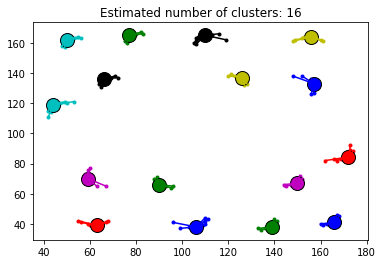

Zen LE
Estimated number of clusters: 18
Silhouette Coefficient: 0.907
0.12192395740332944


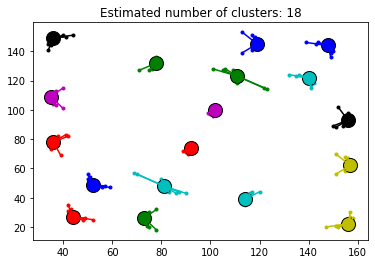

Submarine LE
Estimated number of clusters: 12
Silhouette Coefficient: 0.938
0.11163001536584374


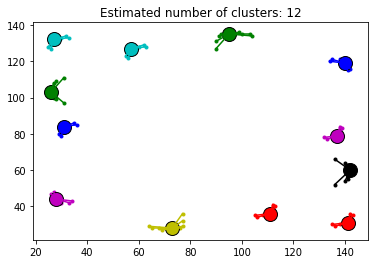

Ever Dream LE
Estimated number of clusters: 16
Silhouette Coefficient: 0.920
0.1027944597739561


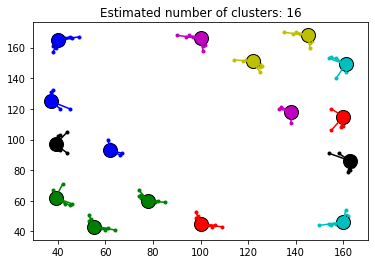

Ever Dream LE
Estimated number of clusters: 16
Silhouette Coefficient: 0.920
0.1027944597739561


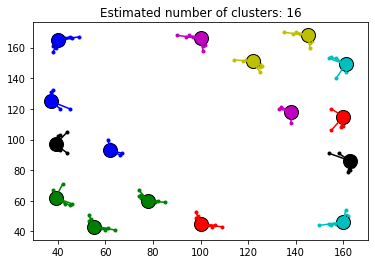

In [245]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import numpy as np
from itertools import cycle, combinations

for r in rs:
    print(r.map.name)
    locs = np.array([o.location for o in r.objects.values() if o.name and ("Mineral" in o.name or "Vespene" in o.name) and hasattr(o, "location")])
    af = AffinityPropagation(preference=-1000).fit(locs)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(locs, labels, metric='sqeuclidean'))
    print(min(dist(a, b) for a, b in combinations(af.cluster_centers_, 2)) / max(r.map.map_info.width, r.map.map_info.height))

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = locs[cluster_centers_indices[k]]
        plt.plot(locs[class_members, 0], locs[class_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
        for loc in locs[class_members]:
            plt.plot([cluster_center[0], loc[0]], [cluster_center[1], loc[1]], col)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

(256, 256, 3)
(256, 256)
(144, 144, 3)


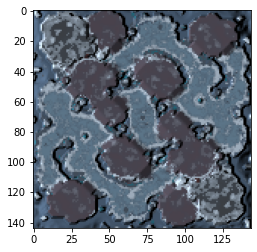

(256, 256, 3)
(256, 256)
(132, 148, 3)


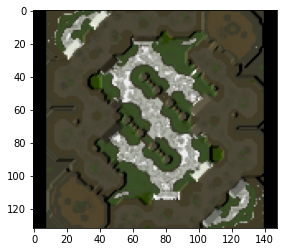

(128, 256, 3)
(128, 256)


IndexError: index 128 is out of bounds for axis 0 with size 128

In [175]:
import matplotlib.pyplot as plt
for r in rs:
    with open("minimap.tga", "wb") as fp:
        fp.write(r.map.minimap)

    im = plt.imread("minimap.tga")
    print(im.shape)
    mask = im.sum(axis=2) > 10
    print(mask.shape)
    
    print(im[np.ix_(mask.any(0), mask.any(1))].shape)
    plt.imshow(im[np.ix_(mask.any(0), mask.any(1))])
    plt.show()

In [143]:
for r in rs:
    print()
    print(r.real_length.total_seconds())
    print([(o.name, o.died_at) for o in r.objects.values() if o.name and ("Mineral" in o.name or "Vespene" in o.name) and hasattr(o, "location") and o.died_at])



1157.0
[('MineralField750', 13113), ('MineralField', 23607), ('MineralField', 16857), ('MineralField750', 13151), ('MineralField750', 21248), ('MineralField750', 23715), ('MineralField', 19958), ('MineralField750', 17673), ('MineralField750', 21980), ('MineralField750', 20783), ('MineralField750', 13767), ('MineralField750', 23881), ('MineralField750', 20230), ('MineralField', 21732), ('MineralField750', 17400), ('MineralField750', 19146), ('MineralField750', 21952), ('MineralField750', 10885), ('MineralField', 23988), ('MineralField', 21465), ('MineralField750', 13114), ('MineralField750', 12943), ('MineralField750', 12236), ('MineralField', 25020), ('MineralField', 21876), ('MineralField750', 22801), ('MineralField750', 24152), ('MineralField', 21715), ('MineralField750', 14254), ('MineralField750', 16440), ('MineralField750', 12554), ('MineralField750', 17722), ('MineralField750', 11192), ('MineralField', 21909), ('MineralField750', 21730), ('MineralField', 22570), ('MineralField75

replays/spawningtool_59334.SC2Replay
[Player 1 - Beastyqt (Terran), Player 2 - demuLarva (Terran)]


replays/spawningtool_59330.SC2Replay
[Player 1 - demuLarva (Terran), Player 2 - LiquidClem (Protoss)]


replays/spawningtool_59303.SC2Replay
[Player 1 - Armani (Zerg), Player 2 - Zest (Protoss)]


replays/spawningtool_59259.SC2Replay
[Player 1 - Mixu (Zerg), Player 2 - Beastyqt (Terran)]


replays/spawningtool_59258.SC2Replay
[Player 1 - lllllllllll (Zerg), Player 2 - Patience (Protoss)]


replays/spawningtool_59257.SC2Replay
[Player 1 - Cham (Zerg), Player 2 - Kelazhur (Terran)]


replays/spawningtool_59256.SC2Replay
[Player 1 - Geralt (Protoss), Player 2 - YTYT (Terran)]


replays/spawningtool_59150.SC2Replay
[Player 1 - starkiller (Zerg), Player 2 - Silky (Zerg)]


replays/spawningtool_59148.SC2Replay
[Player 1 - DisK (Protoss), Player 2 - Silky (Zerg)]


replays/spawningtool_59146.SC2Replay
[Player 1 - starkiller (Zerg), Player 2 - Silky (Zerg)]


replays/spawningtool_59144.SC2Replay
[Player 1 - NYK (Zerg), Player 2 - Dolan (Terran)]


replays/spawningtool_59142.SC2Replay
[Player 1 - NYK (Zerg), Player 2 - Jason (Terran)]


replays/spawningtool_59140.SC2Replay
[Player 1 - Dolan (Terran), Player 2 - Creature (Protoss)]


replays/spawningtool_59139.SC2Replay
[Player 1 - Jason (Terran), Player 2 - Creature (Protoss)]


replays/spawningtool_59138.SC2Replay
[Player 1 - NYK (Zerg), Player 2 - Dolan (Terran)]


replays/spawningtool_59134.SC2Replay
[Player 1 - NYK (Zerg), Player 2 - Dolan (Terran)]


replays/spawningtool_59133.SC2Replay
[Player 1 - NYK (Zerg), Player 2 - Jason (Terran)]


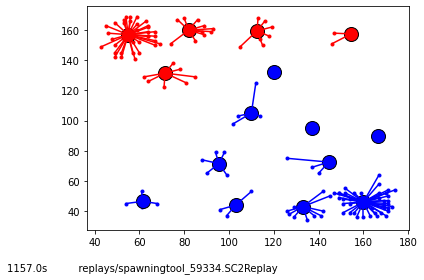

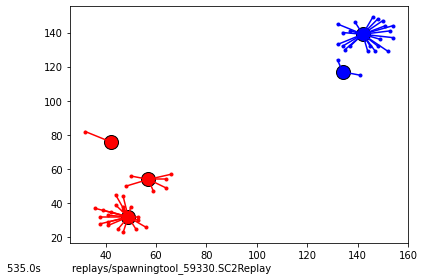

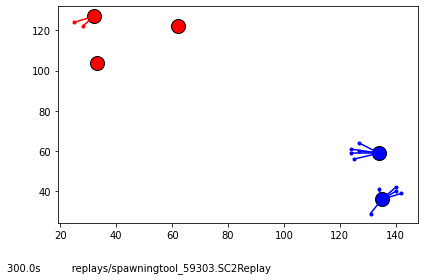

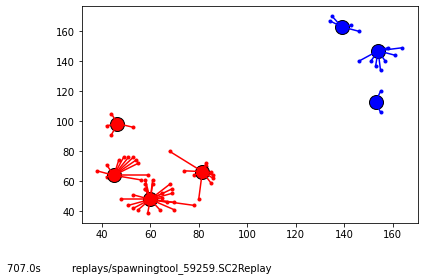

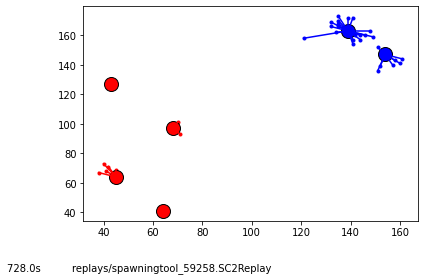

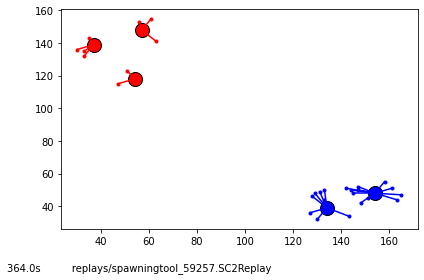

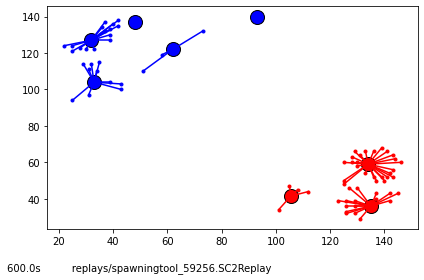

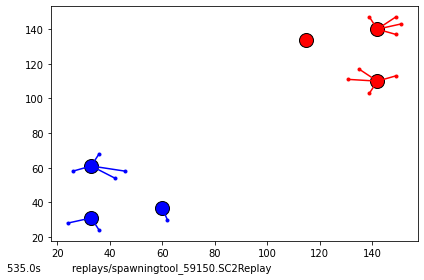

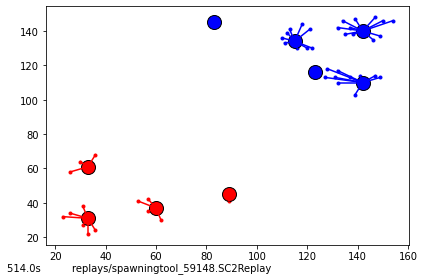

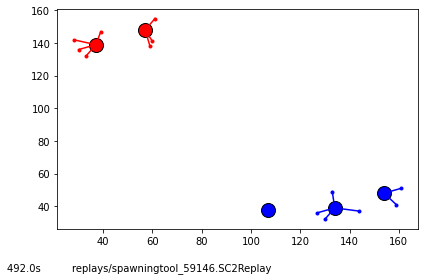

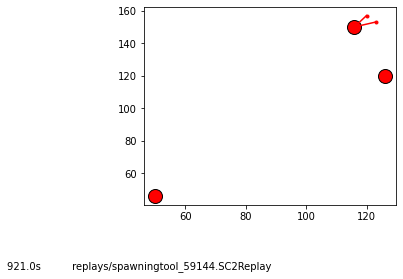

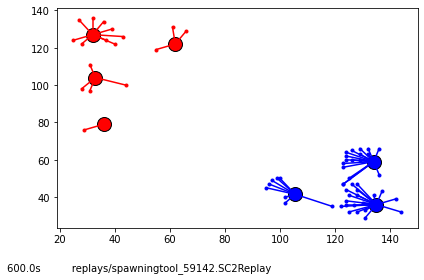

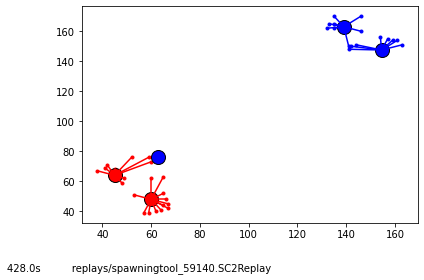

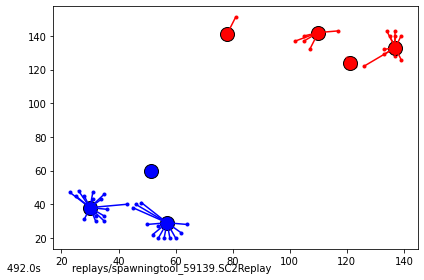

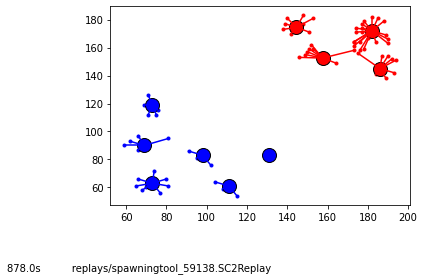

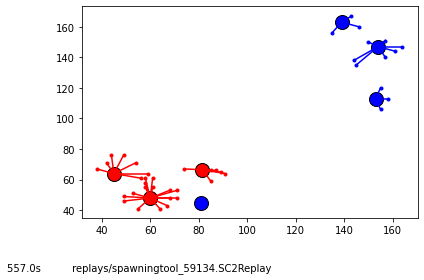

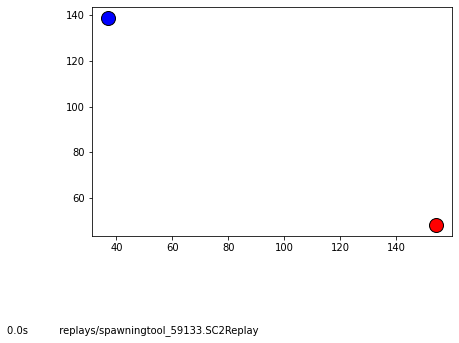

In [297]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)

def select_center(cs):
    if len(cs) == 1:
        return cs[0]
    return min(cs, key=lambda c: np.mean([dist(c, x) for x in cs if x != c]))

for r in rs:
    r.load_map()
    map_dim = (r.map.map_info.width + r.map.map_info.height) / 2
    mineralLocs = [o.location for o in r.objects.values() if o.name and "Mineral" in o.name and hasattr(o, "location")]
#     mining_sites = AffinityPropagation(preference=-1000).fit(mineralLocs).cluster_centers_
    starting_bases = [(e.unit.id, (e.location, e.unit.owner.team_id, 0, True)) for e in r.events if isinstance(e, sc2reader.events.UnitBornEvent) and e.unit.is_building]
    building_locs = dict(starting_bases)
    under_construction = {}
    lookup = {0: building_locs.copy()}
#     print(building_locs)
    for e in r.events:
        if isinstance(e, sc2reader.events.UnitInitEvent) and e.unit.is_building:
            assert e.unit.id not in under_construction
            under_construction[e.unit.id] = (e.location, e.unit.owner.team_id, e.unit.finished_at,
                                             isMiningLoc(mineralLocs, e.location) and e.unit.name in base_names)
        if isinstance(e, sc2reader.events.UnitDoneEvent) and e.unit.is_building:
            assert e.unit.id in under_construction and e.unit.id not in building_locs
            building_locs[e.unit.id] = under_construction[e.unit.id]
            del under_construction[e.unit.id]
            lookup[e.frame] = building_locs.copy()
        if isinstance(e, sc2reader.events.UnitDiedEvent) and e.unit.is_building:
            assert e.unit.id in building_locs or e.unit.id in under_construction
            if e.unit.id in under_construction:
                del under_construction[e.unit.id]
            else:
                del building_locs[e.unit.id]
            lookup[e.frame] = building_locs.copy()
        if e.name == 'TargetPointCommandEvent': # TODO account for interruptions to command
            if e.ability_name in landOCCC:
                selecteds = e.active_selection
                selected_occcs = [obj for obj in selecteds if sorted(obj.type_history.items())[0][1].name == 'CommandCenter']
                if len(selected_occcs) == 0:
                    print(f"Landing an OC/CC but none selected. WTF. event={event}, selecteds={selecteds}")
                else:
                    assert len(selected_occcs) == 1
                    unit = selected_occcs[0]
                    assert unit.id in building_locs
                    building_locs[unit.id] = (e.location[:2], unit.owner.team_id, unit.finished_at,
                                              isMiningLoc(mineralLocs, e.location[:2]) and unit.name in base_names)
                    lookup[e.frame] = building_locs.copy()

    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    
    def update(frame):
#         print(frame)
        ax.clear()
        for f, ls in lookup.items():
            if f <= frame:
                locs, teamids, finishes, prefs = zip(*list(ls.values()))
            else:
                break
        locs = np.array(locs)
        prefs = np.array(prefs)
        finishes = np.array(finishes)
        af = AffinityPropagation(preference=[0 if p else -5000 for p in prefs]).fit(locs)
        cluster_centers_indices = af.cluster_centers_indices_
        centers = af.cluster_centers_.tolist()
        labels = af.labels_
        n_clusters = len(cluster_centers_indices)
        # mining location? must be separate cluster
#         print(f"to split: {[len([p for p in prefs[labels == k] if p]) for k in range(n_clusters_)]}")
        new_centers = []
        for k in range(n_clusters):
            mining_locs = [(loc, finish) for loc, finish, pref in zip(locs[labels == k], finishes[labels == k], prefs[labels == k]) if pref]
            if len(mining_locs) > 1:
                print(f"multiple mining locs ({mining_locs}) in cluster {k}, splitting")
                original = min(mining_locs, key=lambda x: x[1])
                to_split = [x for x in mining_locs if x != original]
                for i, (loc, finish) in enumerate(to_split):
                    new_label = n_clusters + i
                    labels[(locs == loc).all(axis=1).nonzero()] = new_label
                    members = [(loc, finish) for loc, finish, pref in zip(locs[labels == k], finishes[labels == k], prefs[labels == k]) if not pref]
                    for ml, mf in members:
                        if dist(ml, loc) == min(dist(ml, x[0]) for x in [original] + to_split[:i] + to_split[i + 1:]) and mf >= finish:
                            labels[(locs == ml).all(axis=1).nonzero()] = new_label
                new_centers.append(loc)
                
        for c in new_centers:
            cluster_centers_indices = np.append(cluster_centers_indices, (locs == c).all(axis=1).nonzero())
            n_clusters += 1

        # maximum distance
        new_centers = []
        for loc in locs:
            if all(dist(loc, c) / map_dim > 0.1 for c in centers):
                if any(dist(loc, select_center(cs)) / map_dim <= 0.1 for cs in new_centers):
                    _, i = min((dist(loc, select_center(cs)), i) for i, cs in enumerate(new_centers))
#                     print(f"{loc} actually closest to new center {select_center(new_centers[i])}, merging")
                    labels[(locs == loc).all(axis=1).nonzero()] = n_clusters + i
                    new_centers[i].append(tuple(loc))
                else:
#                     print(f"{loc} more than {map_dim * 0.1} away from all cluster centers, splitting")
                    labels[(locs == loc).all(axis=1).nonzero()] = n_clusters + len(new_centers)
                    new_centers.append([tuple(loc)])

        for cs in new_centers:
            central = select_center(cs)
            cluster_centers_indices = np.append(cluster_centers_indices, (locs == central).all(axis=1).nonzero())
            n_clusters += 1
                    
        colors = " br"
        
        for k in range(n_clusters):
            class_members = labels == k
            cluster_center = locs[cluster_centers_indices[k]]
            col = colors[teamids[cluster_centers_indices[k]]]
            ax.plot(locs[class_members, 0], locs[class_members, 1], col + '.')
            ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=14)
            for loc in locs[class_members]:
                ax.plot([cluster_center[0], loc[0]], [cluster_center[1], loc[1]], col)
        ax.text(1, 1, f"{frame // 22.4}s          {r.filename}")
        return ax
                
    anim = FuncAnimation(fig, update, frames=np.arange(0, r.frames, 480), interval=200)
    print(r.filename)
    print(r.players)
    display(HTML(anim.to_html5_video()))
#     plt.show()
            
#     locs = np.array([o.location for o in r.objects.values() if o.name and ("Mineral" in o.name or "Vespene" in o.name) and hasattr(o, "location")])
#     af = AffinityPropagation(preference=-1000).fit(locs)
#     cluster_centers_indices = af.cluster_centers_indices_
#     labels = af.labels_

#     n_clusters_ = len(cluster_centers_indices)
#     print('Estimated number of clusters: %d' % n_clusters_)
#     print("Silhouette Coefficient: %0.3f"
#           % metrics.silhouette_score(locs, labels, metric='sqeuclidean'))

#     colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')


#     plt.title('Estimated number of clusters: %d' % n_clusters_)
#     plt.show()

In [202]:
for r in rs:
    print([e.location for e in r.events if isinstance(e, sc2reader.events.UnitBornEvent) and e.unit.is_building])
    print(np.arange(0, r.frames, 160))

[(160, 46), (55, 157)]
[    0   160   320   480   640   800   960  1120  1280  1440  1600  1760
  1920  2080  2240  2400  2560  2720  2880  3040  3200  3360  3520  3680
  3840  4000  4160  4320  4480  4640  4800  4960  5120  5280  5440  5600
  5760  5920  6080  6240  6400  6560  6720  6880  7040  7200  7360  7520
  7680  7840  8000  8160  8320  8480  8640  8800  8960  9120  9280  9440
  9600  9760  9920 10080 10240 10400 10560 10720 10880 11040 11200 11360
 11520 11680 11840 12000 12160 12320 12480 12640 12800 12960 13120 13280
 13440 13600 13760 13920 14080 14240 14400 14560 14720 14880 15040 15200
 15360 15520 15680 15840 16000 16160 16320 16480 16640 16800 16960 17120
 17280 17440 17600 17760 17920 18080 18240 18400 18560 18720 18880 19040
 19200 19360 19520 19680 19840 20000 20160 20320 20480 20640 20800 20960
 21120 21280 21440 21600 21760 21920 22080 22240 22400 22560 22720 22880
 23040 23200 23360 23520 23680 23840 24000 24160 24320 24480 24640 24800
 24960 25120 25280 25440 256

In [216]:
rs[0].filename

'replays/spawningtool_59334.SC2Replay'

In [12]:
max([e.frame for e in r.events]), min([e.frame for e in r.events]), r.frames

(17024, 0, 17024)

In [59]:
from base_plugins import BaseTracker
sc2reader.engine.register_plugin(BaseTracker())

In [60]:
r = sc2reader.load_replay("/Accounts/awb/pattern-analysis/starcraft/replays/gggreplays_264186.SC2Replay")
print(r.plugin_result)

flying building BarracksFlying [3DC0001] should not be in dict: /Accounts/awb/pattern-analysis/starcraft/replays/gggreplays_264186.SC2Replay, 08.58	Osau            Ability (1380) - LandBarracks; Location: (28.5, 130.5, 49111)
flying building CommandCenterFlying [4580003] should not be in dict: /Accounts/awb/pattern-analysis/starcraft/replays/gggreplays_264186.SC2Replay, 11.24	Osau            Ability (1240) - LandCommandCenter; Location: (45.5, 134.5, 49111)
{'GameHeartNormalizer': (0, {}), 'BaseTracker': (1, {'error': KeyError(72876035)}), 'ContextLoader': (0, {}), 'SelectionTracker': (0, {}), 'APMTracker': (0, {}), 'ActiveSelection': (0, {})}


In [64]:
from pprint import pprint
f = "replays/gggreplays_264186.SC2Replay"
r = sc2reader.load_replay(f)
def get_current_name(unit, frame):
    name = unit.name
    for f, t in unit.type_history.items():
        if frame >= f:
            name = t.name
    return name
# for r in rs:
pprint([(e.frame, str(e)) for e in r.events if hasattr(e, "ability_name") and "Lift" in e.ability_name])
pprint([(e.frame, [u for u in e.active_selection]) for e in r.events if hasattr(e, "ability_name") and "Lift" in e.ability_name])
pprint([(e.frame, str(e)) for e in r.events if hasattr(e, "ability_name") and "Land" in e.ability_name])
pprint([(e.frame, e.player.selection, e.active_selection) for e in r.events if hasattr(e, "ability_name") and "Land" in e.ability_name])
pprint([(get_current_name(e.unit, e.frame - 1), e.unit_type_name, str(e), e.frame) for e in r.events if isinstance(e, sc2reader.events.UnitTypeChangeEvent)])

flying building BarracksFlying [3DC0001] should not be in dict: replays/gggreplays_264186.SC2Replay, 08.58	Osau            Ability (1380) - LandBarracks; Location: (28.5, 130.5, 49111)
flying building CommandCenterFlying [4580003] should not be in dict: replays/gggreplays_264186.SC2Replay, 11.24	Osau            Ability (1240) - LandCommandCenter; Location: (45.5, 134.5, 49111)
[(6729, '07.00\tOsau            Ability (1280) - LiftBarracks'),
 (7280, '07.35\tllllllllllll    Ability (1300) - LiftStarport'),
 (7572, '07.53\tllllllllllll    Ability (1280) - LiftBarracks'),
 (9192, '09.34\tOsau            Ability (1220) - LiftCommandCenter'),
 (9896, '10.18\tOsau            Ability (1220) - LiftCommandCenter'),
 (11435, '11.54\tOsau            Ability (1220) - LiftCommandCenter'),
 (14574, '15.10\tOsau            Ability (1220) - LiftCommandCenter')]
[(6729, [Barracks [3D40001]]),
 (7280, [Starport [4400001]]),
 (7572, [Barracks [47C0002]]),
 (9192, [CommandCenterFlying [4580003]]),
 (9896, 

AttributeError: 'TargetPointCommandEvent' object has no attribute 'selection_errors'